In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 4
D = 2

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
T = np.array([0, 1, 1, 0])

ones = np.array([[1]*N]).T

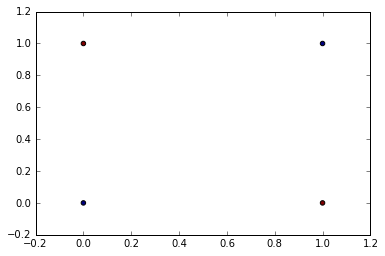

In [6]:
plt.scatter(X[:,0], X[:,1], c=T);

In [ ]:
# Can't find a line that will give you a perfect classification!
# The trick is to add another dimension to our input
# This turns it into a 3d prblem from a 2d problme
# Then we can draw a plane between the two datasets

In [7]:
xy = np.matrix(X[:,0] * X[:,1]).T
Xb = np.array(np.concatenate((ones, xy, X), axis=1))

In [24]:
# randomly initialize the weights
w = np.random.randn(D + 2)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1-Y[i])
    return E

1.80435152575
1.79689601647
1.78950336118
1.78217264826
1.77490299268
1.76769353472
1.76054343893
1.75345189304
1.74641810693
1.7394413117
1.73252075871
1.7256557188
1.71884548137
1.71208935367
1.70538666003
1.69873674114
1.69213895343
1.68559266837
1.6790972719
1.67265216385
1.66625675741
1.65991047858
1.65361276568
1.64736306889
1.64116084981
1.63500558101
1.62889674566
1.62283383709
1.61681635848
1.61084382249
1.60491575089
1.59903167432
1.5931911319
1.58739367102
1.58163884701
1.57592622291
1.57025536921
1.56462586359
1.55903729074
1.5534892421
1.54798131569
1.54251311588
1.5370842532
1.53169434419
1.52634301122
1.52102988229
1.51575459091
1.51051677594
1.50531608145
1.50015215654
1.49502465529
1.48993323655
1.48487756386
1.47985730533
1.47487213353
1.46992172537
1.46500576201
1.46012392875
1.45527591493
1.45046141388
1.44568012276
1.44093174256
1.43621597793
1.43153253719
1.42688113218
1.42226147823
1.41767329408
1.41311630182
1.40859022679
1.40409479756
1.39962974586
1.3951948065

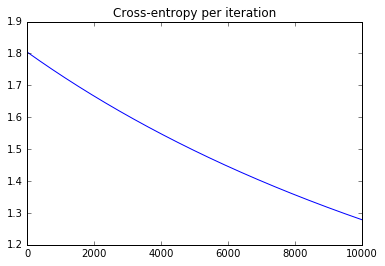

In [28]:
learning_rate = 0.001
error = []
for i in range(10000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 100 == 0:
        print(e)
        
    # gradient descent weight update with regularization
    w += learning_rate * (np.dot((T-Y).T, Xb) - 0.01*w)
    
    # recalculate Y
    Y = sigmoid(Xb.dot(w))
    
plt.plot(error)
plt.title("Cross-entropy per iteration")

print("Final w:", w)
print("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)

- These past two examples bring up interesting examples for machine learning
- Can apply logistic regression to some complex problems by manually engineering features
- In ML ideally, the machine would be able to learn these things
- This is precisely what neural networks do!